## Portfolio assignment 15
30 min: Train a decision tree to predict the species of a penguin based on their characteristics.
- Split the penguin dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
<b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to 
 - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
 - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree_classification function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier as DTClassifier 
from sklearn.model_selection import train_test_split as T_T_S

import graphviz

In [2]:
data = sns.load_dataset('penguins')
data.shape
data = data.dropna()

In [3]:
data.species.value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

### Split dataset

In [4]:
peng_train, peng_test = T_T_S(data, test_size=0.3, stratify=data['species'], random_state=42)
print(peng_train.shape, peng_test.shape)

(233, 7) (100, 7)


### Decision Tree

In [5]:
dt = DTClassifier(max_depth = 1)
dt.fit(peng_train[['flipper_length_mm']], peng_train['species'])

DecisionTreeClassifier(max_depth=1)

In [6]:
from sklearn import tree

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(
                                  model, 
                                  out_file = None, 
                                  feature_names = features,  
                                  class_names = class_names,  
                                  filled = True, 
                                  rounded = True,  
                                  special_characters = True
    )  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

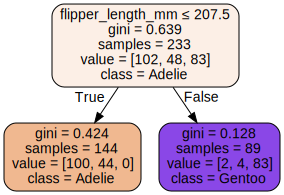

In [7]:
plot_tree_classification(dt, ['flipper_length_mm'], data.species.unique())

### Predictions

In [8]:
predictionsTrain = dt.predict(peng_train[['flipper_length_mm']])
predictionsTrain

array(['Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gent

In [9]:
predictionsTest = dt.predict(peng_test[['flipper_length_mm']])
predictionsTest

array(['Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adel

### Accuracy

In [11]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [12]:
predictionsTrainset = dt.predict(peng_train[['flipper_length_mm']])
predictionsTestset = dt.predict(peng_test[['flipper_length_mm']])

accuracyTrain = calculate_accuracy(predictionsTrainset, peng_train.species)
accuracyTest = calculate_accuracy(predictionsTestset, peng_test.species)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.7854077253218884
Accuracy on test set 0.78
